# CSC221 2024FA Group Project
### Author: Jack Stahl (jestahl1@my.waketech.edu)

This is a simple web scraper used to scrape the *Albums* table from the *They Might Be Giants Discography* Wikipedia article.

Link: [They Might Be Giants Discography](https://en.wikipedia.org/wiki/They_Might_Be_Giants_discography)


## Importing packages and requesting article

In [67]:
# Import BeautifulSoup, URLlib, and Pandas
from bs4 import BeautifulSoup as soup
import urllib.request as request
import pandas as pd

# Push article URL
url = "https://en.wikipedia.org/wiki/They_Might_Be_Giants_discography"

# Request article
with request.urlopen(url) as article_request:
    # Parse Article
    article = soup(article_request, "lxml")

# Print Article For Debugging
print(soup.prettify(article))

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   They Might Be Giants discography - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature

## Find Table

In [69]:
# Find table
album_table = article.find_all('table', class_='wikitable plainrowheaders')[0]
print(album_table)
# Print all tables with the class 'wikitable sortable' to find the target table


<table class="wikitable plainrowheaders" style="text-align:center;">
<caption>List of studio albums, with selected chart positions and certifications
</caption>
<tbody><tr>
<th rowspan="2" style="width:33px;">Year
</th>
<th rowspan="2" style="width:225px;">Title
</th>
<th colspan="7">Chart peaks
</th>
<th rowspan="2" style="width:125px;"><a class="mw-redirect" href="/wiki/Music_recording_sales_certification" title="Music recording sales certification">Certifications</a><br/><small>(<a class="mw-redirect" href="/wiki/List_of_music_recording_sales_certifications" title="List of music recording sales certifications">sales thresholds</a>)</small>
</th>
<th rowspan="2" style="width:325px;">Notes
</th></tr>
<tr>
<th style="width:3em;font-size:85%;"><a href="/wiki/Billboard_200" title="Billboard 200">US</a><br/><sup class="reference" id="cite_ref-BB200_1-0"><a href="#cite_note-BB200-1"><span class="cite-bracket">[</span>1<span class="cite-bracket">]</span></a></sup>
</th>
<th style="width:3em

## Process Table

In [71]:
# Initialize lists for columns
Year, Title, US, US_Alt, US_Kids, US_Indie, US_Rock, AUS, UK, Certifications, Notes = (
    [], [], [], [], [], [], [], [], [], [], []
)

# Loop through all rows in the album_table and extract data
for row in album_table.find_all('tr'):
    cells = row.find_all('td')
    
    # Ensure the row has the correct number of cells (skip header rows or irregular rows)
    if len(cells) >= 9:
        Year.append(cells[0].get_text(strip=True))
        Title.append(cells[1].get_text(strip=True))
        US.append(cells[2].get_text(strip=True))
        US_Alt.append(cells[3].get_text(strip=True))
        US_Kids.append(cells[4].get_text(strip=True))
        US_Indie.append(cells[5].get_text(strip=True))
        US_Rock.append(cells[6].get_text(strip=True))
        AUS.append(cells[7].get_text(strip=True))
        UK.append(cells[8].get_text(strip=True))
        Certifications.append(cells[9].get_text(strip=True) if len(cells) > 9 else "")
        Notes.append(cells[10].get_text(strip=True) if len(cells) > 10 else "")

# Create a pandas DataFrame using the extracted data
album_dataframe = pd.DataFrame({
    "Year": Year,
    "Title": Title,
    "US": US,
    "US_Alt": US_Alt,
    "US_Kids": US_Kids,
    "US_Indie": US_Indie,
    "US_Rock": US_Rock,
    "AUS": AUS,
    "UK": UK,
    "Certifications": Certifications,
    "Notes": Notes,
})

# Display the DataFrame and save to CSV
album_dataframe
album_dataframe.to_csv('CSC221-webscrape-data.csv')

print('CSV file created')

CSV file created


# Part II
### Author: Seth VanDuinen (arvanduinen@my.waketech.edu)

In [83]:
import os
import numpy as np
from matplotlib import pyplot as plt

DF_DISCOGRAPHY = pd.read_csv('CSC221-webscrape-data.csv').head(10)
DF_DISCOGRAPHY

,Unnamed: 0,Year,Title,US,US_Alt,US_Kids,US_Indie,US_Rock,AUS,UK,Certifications,Notes
0,0,1986,"They Might Be GiantsRelease date: November 4, ...",—,—,—,—,—,159,—,NaN,Debut album
1,1,1988,"LincolnRelease date: September 25, 1988Label: ...",89,—,—,—,—,116,—,NaN,NaN
2,2,1990,"FloodRelease date: January 15, 1990Label:Elekt...",75,—,—,—,—,99,14,RIAA: Platinum[9]BPI: Gold[10],Major label debut
3,3,1992,"Apollo 18Release date: March 24, 1992Label: El...",99,—,—,—,—,59,—,NaN,NaN
4,4,1994,"John HenryRelease date: September 13, 1994Labe...",61,—,—,—,—,132,—,NaN,First album with a backing band.
5,5,1996,"Factory ShowroomRelease date: October 8, 1996L...",89,—,—,—,—,116,—,NaN,NaN
6,6,1999,"Long Tall WeekendRelease date: July 19, 1999La...",—,—,—,—,—,—,—,NaN,"Download-only album, released oneMusic.comFirs..."
7,7,2001,"Mink CarRelease date: September 11, 2001Label:...",134,—,—,—,—,102,—,NaN,NaN
8,8,2002,"No!Release date: June 11, 2002Label: Idlewild/...",—,—,1,—,—,—,—,NaN,Firstchildren's album
9,9,2004,"The SpineRelease date: July 13, 2004Label: Idl...",130,—,—,—,—,—,—,NaN,NaN


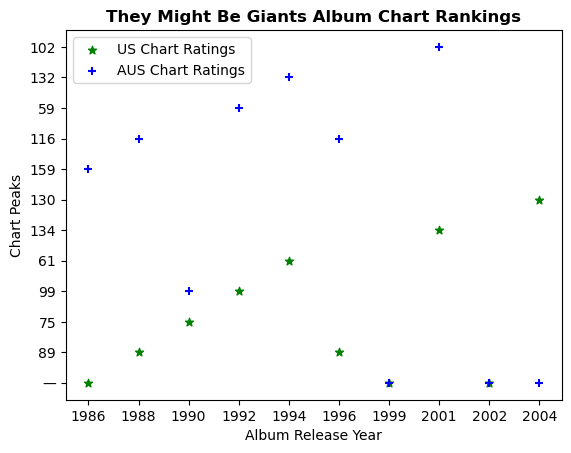

In [203]:
US_RATINGS = np.array(DF_DISCOGRAPHY['US'])
AUS_RATINGS = np.array(DF_DISCOGRAPHY['AUS'])

X_VALUES = np.array(DF_DISCOGRAPHY['Year'])

plt.title('They Might Be Giants Album Chart Rankings', fontsize=12, fontweight='bold')
plt.xlabel('Album Release Year')
plt.ylabel('Chart Peaks')

plt.scatter(X_VALUES, US_RATINGS, label='US Chart Ratings', marker='*', color='green')
plt.scatter(X_VALUES, AUS_RATINGS, label='AUS Chart Ratings', marker='+', color='blue')

plt.legend()
plt.show()